In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1.0 Scripts used for illustrations or other information provided in the thesis 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

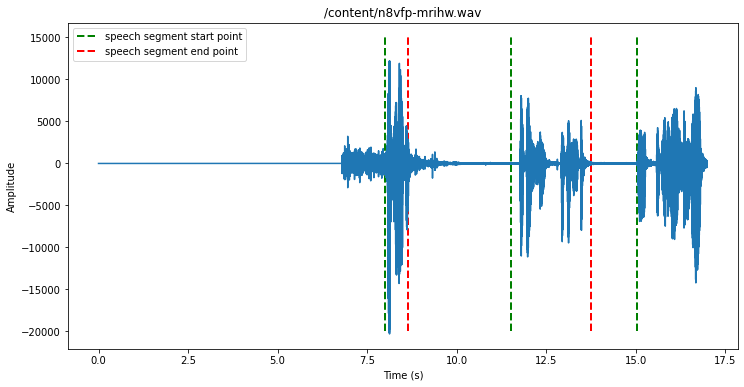

In [ ]:
import os
import scipy.io
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
xs = np.linspace(5, 20, 200)

myAudioFilename = ('/content/n8vfp-mrihw.wav')  #  plot this wav file     ~/audio/aaa.wav

dataset_path = os.path.join(os.environ['HOME'], 'audio') # homedir -> audiodir -> my wav files
wavedata = os.path.join(dataset_path, myAudioFilename)
   
sampleRate, audioBuffer = scipy.io.wavfile.read(wavedata)

duration = len(audioBuffer)/sampleRate

time = np.arange(0,duration,1/sampleRate) #time vector

plt.rcParams['figure.figsize'] = [12, 6]
plt.plot(time,audioBuffer)
plt.vlines(x=[8.0, 11.52, 15.04], ymin=-20000, ymax=15000, colors='green', ls='--', lw=2, label='speech segment start point')
plt.vlines(x=[8.64, 13.75], ymin=-20000, ymax=15000, colors='red', ls='--', lw=2, label='speech segment end point')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(myAudioFilename)
plt.legend(loc='upper left')
plt.savefig("abc.png")
files.download("abc.png") 
plt.show()

 **Script used for average number of words per line and the standard deviation**

In [ ]:
#original version retreived from https://www.geeksforgeeks.org/python-get-number-of-characters-words-spaces-and-lines-in-a-file/

import math

def variance(data, ddof=0):
    n = len(data)
    mean = sum(data) / n
    return sum((x - mean) ** 2 for x in data) / (n - ddof)

def stdev(data, ddof=0):
    return math.sqrt(variance(data, ddof))

def counter(fname):
  
    # variable to store total word count
    num_words = 0
    num_words_line = 0

    # list of lengths
    num_words_list = []

    num_lines = 0
      
    num_charc = 0
      
    num_spaces = 0
      
    with open(fname, 'r') as f:
          
        for line in f:
               
            num_lines += 1
              
            word = 'Y'
         
            for letter in line:
                  
                if (letter != ' ' and word == 'Y'):
                      
                    num_words_line += 1
                    num_words += 1
                      
                    word = 'N'
                      
                elif (letter == ' '):
                  
                    num_spaces += 1
                      
                    word = 'Y'
                      
                for i in letter:
                      
              
                    if(i !=" " and i !="\n"):
                          
                      
                        num_charc += 1

            num_words_list.append(num_words_line)  
            num_words_line = 0

 
    print("Number of words in text file: ", num_words)

    print("Number of lines in text file: ", num_lines)
  
    print("Mean number of words per line:  ", num_words/num_lines)

    print("Standard Deviation of lengths:  ", stdev(num_words_list))

In [ ]:
fname = '/content/drive/MyDrive/NLP/Output/Cascaded/pt-es_cascaded/pt-es.beam.pred.webrtcvad.test.3.pt'
counter(fname) 

Number of words in text file:  16031
Number of lines in text file:  1990
Mean number of words per line:   8.055778894472361
Standard Deviation of lengths:   6.8550978185483284


#2.0 Setup
#Conda -> Python 3.7 and Setting up the environment

In [ ]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml-0.15.37-py36h14c3975_2 ...
installing: six-1.11

--2022-01-14 10:34:50--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2022-01-14 10:34:50--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 37.1M 2s
    50K .......... .......... .......... .......... ..........  0%

In [ ]:
%cd /content/drive/MyDrive/NLP/NMTGMinor

/content/drive/MyDrive/NLP/NMTGMinor


In [ ]:
!conda env create -f environment.yml

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

In [ ]:
!pip install sacrebleu

    100% |████████████████████████████████| 92kB 9.0MB/s 
    100% |████████████████████████████████| 13.4MB 3.6MB/s 
    100% |████████████████████████████████| 675kB 22.1MB/s 


**Installing Apex and the Sentence Piece Toolkit**

In [ ]:
%%bash

source activate gminor
git clone https://github.com/NVIDIA/apex
cd apex
pip install -v --disable-pip-version-check --no-cache-dir ./

Non-user install because site-packages writeable
Created temporary directory: /tmp/pip-ephem-wheel-cache-z_ajsn8x
Created temporary directory: /tmp/pip-req-tracker-ima8o8ot
Initialized build tracking at /tmp/pip-req-tracker-ima8o8ot
Created build tracker: /tmp/pip-req-tracker-ima8o8ot
Entered build tracker: /tmp/pip-req-tracker-ima8o8ot
Created temporary directory: /tmp/pip-install-52wfmb2f
Processing /content/drive/My Drive/NLP/NMTGMinor/apex
  Created temporary directory: /tmp/pip-req-build-f50fzm5z
  Added file:///content/drive/My%20Drive/NLP/NMTGMinor/apex to build tracker '/tmp/pip-req-tracker-ima8o8ot'
    Running setup.py (path:/tmp/pip-req-build-f50fzm5z/setup.py) egg_info for package from file:///content/drive/My%20Drive/NLP/NMTGMinor/apex
    Created temporary directory: /tmp/pip-pip-egg-info-dbezp9ub
  Source in /tmp/pip-req-build-f50fzm5z has version 0.1, which satisfies requirement apex==0.1 from file:///content/drive/My%20Drive/NLP/NMTGMinor/apex
  Removed apex==0.1 from 

fatal: destination path 'apex' already exists and is not an empty directory.
    Running command python setup.py egg_info


    torch.__version__  = 1.5.1


    running egg_info
    creating /tmp/pip-pip-egg-info-dbezp9ub/apex.egg-info
    writing /tmp/pip-pip-egg-info-dbezp9ub/apex.egg-info/PKG-INFO
    writing dependency_links to /tmp/pip-pip-egg-info-dbezp9ub/apex.egg-info/dependency_links.txt
    writing top-level names to /tmp/pip-pip-egg-info-dbezp9ub/apex.egg-info/top_level.txt
    writing manifest file '/tmp/pip-pip-egg-info-dbezp9ub/apex.egg-info/SOURCES.txt'
    reading manifest file '/tmp/pip-pip-egg-info-dbezp9ub/apex.egg-info/SOURCES.txt'
    writing manifest file '/tmp/pip-pip-egg-info-dbezp9ub/apex.egg-info/SOURCES.txt'
    /tmp/pip-req-build-f50fzm5z/setup.py:67: UserWarning: Option --pyprof not specified. Not installing PyProf dependencies!
      warnings.warn("Option --pyprof not specified. Not installing PyProf dependencies!")
  Running command /usr/local/envs/gminor

In [ ]:
%%bash
source activate gminor

cd /content/drive/MyDrive/NLP/
git clone https://github.com/google/sentencepiece.git 
cd sentencepiece
mkdir build
cd build
cmake ..
make -j $(nproc)
sudo make install
sudo ldconfig -v


-- VERSION: 0.1.96
-- Not Found TCMalloc: TCMALLOC_LIB-NOTFOUND
-- Configuring done
-- Generating done
-- Build files have been written to: /content/drive/MyDrive/NLP/sentencepiece/build
[ 34%] Built target sentencepiece-static
[ 44%] Built target sentencepiece_train-static
[ 80%] Built target sentencepiece
[ 82%] Built target spm_decode
[ 85%] Built target spm_export_vocab
[ 85%] Built target spm_encode
[ 94%] Built target sentencepiece_train
[ 96%] Built target spm_train
[ 98%] Built target spm_normalize
[ 34%] Built target sentencepiece
[ 44%] Built target sentencepiece_train-static
[ 45%] Built target spm_encode
[ 54%] Built target sentencepiece_train
[ 56%] Built target spm_train
[ 58%] Built target spm_decode
[ 60%] Built target spm_normalize
[ 96%] Built target sentencepiece-static
[ 98%] Built target spm_export_vocab
Install the project...
-- Install configuration: ""
-- Installing: /usr/local/lib/pkgconfig/sentencepiece.pc
-- Installing: /usr/local/lib/libsentencepiece.so.0.0.

fatal: destination path 'sentencepiece' already exists and is not an empty directory.
mkdir: cannot create directory ‘build’: File exists
/sbin/ldconfig.real: Can't stat /usr/local/cuda-11.1/extras/CUPTI/lib64: No such file or directory
/sbin/ldconfig.real: Path `/usr/local/lib' given more than once
/sbin/ldconfig.real: Can't stat /usr/local/nvidia/lib: No such file or directory
/sbin/ldconfig.real: Can't stat /usr/local/nvidia/lib64: No such file or directory
/sbin/ldconfig.real: Can't stat /usr/local/lib/x86_64-linux-gnu: No such file or directory
/sbin/ldconfig.real: Path `/lib/x86_64-linux-gnu' given more than once
/sbin/ldconfig.real: Path `/usr/lib/x86_64-linux-gnu' given more than once
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

/sbin/ldconfig.real: /lib/x86_64-linux-gnu/ld-2.27.so is the dynamic linker, ignoring

/sbin/ldconfig.real: /lib32/ld-2.27.so is the dynamic linker, ignoring



In [ ]:
%%bash
pip install 2to3
cd /content/drive/MyDrive/NLP/SLT.KIT/scripts/monoTranslationData/
2to3 AddPunctuation.py -w

RefactoringTool: Skipping optional fixer: buffer
RefactoringTool: Skipping optional fixer: idioms
RefactoringTool: Skipping optional fixer: set_literal
RefactoringTool: Skipping optional fixer: ws_comma
RefactoringTool: Can't parse AddPunctuation.py: ParseError: bad input: type=22, value='=', context=('', (41, 37))
RefactoringTool: No files need to be modified.
RefactoringTool: There was 1 error:
RefactoringTool: Can't parse AddPunctuation.py: ParseError: bad input: type=22, value='=', context=('', (41, 37))


In [ ]:
%%bash
pip install asr-evaluation

#3.0 Preprocessing the test and validation datasets

In [ ]:
import torch
import torch.nn as nn
import torch.cuda.amp as amp

In [ ]:
%cd /content/drive/MyDrive/NLP/niehues/I6199043/iwslt21/raw_data/

In [ ]:
%%bash

for lan_pair in pt-pt; do
        for partition in test; do
                cd $lan_pair/data/$partition/wav/

                for f in ./*flac; do    
                        ffmpeg -y -i $f "${f%.*}".wav
                done

                for f in *wav; do
                        # mono channel, downsample from 48kHz to 16kHz
                        echo $f;
                        sox -v 0.99 $f -c 1 -r 16000 mono.$f;
                done

                for f in mono*wav; do
                        mv $f "${f#mono.}";
                done
        done
done

#E2E

In [ ]:
%%bash
source activate gminor

PREPRO_DIR=prepro_16000_all
export BASEDIR=/content/drive/MyDrive/NLP/niehues/iwslt21/slt/
export OUTDIR=/content/drive/MyDrive/NLP/niehues/iwslt21/
export NMTDIR=/content/drive/MyDrive/NLP/NMTGMinor

export name=$1

for lan_pair in it-es; do

  nr=04
  tool=inaspeech

  for partition in valid; do

    sl=${lan_pair:0:2}
    tl=${lan_pair:3:5}

    echo "-------"
    echo $sl
    echo $tl
    echo "-------"

    mkdir $OUTDIR/data/$name/eval/$partition/ -p

    for beam in 8; do
  
      pred_src=$BASEDIR/data/$PREPRO_DIR/eval/$partition/$lan_pair.s
      echo 'Source: ' $pred_src
      ref=$BASEDIR/data/orig/$partition/$lan_pair/raw_text_filtered
      echo 'Ref:' $ref

      bos='#'${tl}'#'

      model=model
      out=$OUTDIR/data/$name/eval/$partition/$model.$sl-${tl}.beam${beam}.pred

      echo 'Out:'
      echo $out

      python3 -u $NMTDIR/translate.py -gpu 0 \
      -model /content/drive/MyDrive/NLP/niehues/iwslt21/slt/model/transformer.12.prepro_16000_all.asrslt.allpseudo.augment.fp32/model.pt \
      -src /content/drive/MyDrive/NLP/niehues/I6199043/iwslt21/data/data/orig/${partition}/${sl}-en_valid_${tool}_${nr}/feats.scp \
      -batch_size 1 -verbose \
      -beam_size $beam -alpha 1.0 \
      -normalize \
      -fast_translate \
      -asr_format scp \
      -encoder_type audio \
      -concat 4 \
      -src_lang $sl \
      -tgt_lang $tl \
      -output $out \

      sed -e "s/ //g" $out | sed 's/^.//' | sed -e "s/▁/ /g" > /content/drive/MyDrive/NLP/Output/E2E/it-es_e2e/${sl}-${tl}_${partition}_${tool}_${nr}.pt
      sed -e "s/ //g" $out | sed 's/^.//' | sed -e "s/▁/ /g" > /content/drive/MyDrive/NLP/Output/E2E/${sl}-${tl}_${partition}_${tool}_${nr}.pt
      
  
      cat /content/drive/MyDrive/NLP/Output/E2E/${sl}-${tl}_${partition}_${tool}_${nr}.pt | awk '{ printf("%s ", $0) }' >  /content/drive/MyDrive/NLP/Output/E2E/${sl}-${tl}_${partition}_${tool}_${nr}.complete
      cat /content/drive/MyDrive/NLP/niehues/mtedx_iwslt2021_valid/it-es/data/valid/txt/valid.es | awk '{ printf("%s ", $0) }' >  /content/drive/MyDrive/NLP/niehues/mtedx_iwslt2021_valid/it-es/data/valid/txt/valid.es.complete

      echo "#######################BLEU###############"

      cat /content/drive/MyDrive/NLP/Output/E2E/${sl}-${tl}_${partition}_${tool}_${nr}.complete | sacrebleu /content/drive/MyDrive/NLP/niehues/mtedx_iwslt2021_valid/it-es/data/valid/txt/valid.es.complete




done
done
done

-------
it
es
-------
Source:  /content/drive/MyDrive/NLP/niehues/iwslt21/slt//data/prepro_16000_all/eval/valid/it-es.s
Ref: /content/drive/MyDrive/NLP/niehues/iwslt21/slt//data/orig/valid/it-es/raw_text_filtered
Out:
/content/drive/MyDrive/NLP/niehues/iwslt21//data//eval/valid/model.it-es.beam8.pred
['/content/drive/MyDrive/NLP/niehues/iwslt21/slt/model/transformer.12.prepro_16000_all.asrslt.allpseudo.augment.fp32/model.pt']
Loading model from /content/drive/MyDrive/NLP/niehues/iwslt21/slt/model/transformer.12.prepro_16000_all.asrslt.allpseudo.augment.fp32/model.pt
* Create language embeddings with 5 languages
* Transformer Encoder with Absolute Attention with 26.75 expected layers
* Transformer Decoder with Absolute Attention with 8.75 expected layers
* Joining the weights of decoder input and output embeddings
Done
* Current bos id: 2 2
* Using fast beam search implementation
Batch size: 10 0
torch.Size([318, 10, 173])
Result: 10
PRED 1: ▁En ▁el ▁año ▁2016, ▁me ▁confer í ▁un ▁premio

#ASR

In [ ]:
%%bash
source activate gminor

PREPRO_DIR=prepro_16000_all
export BASEDIR=/content/drive/MyDrive/NLP/niehues/iwslt21/slt/
export OUTDIR=/content/drive/MyDrive/NLP/niehues/iwslt21/
export NMTDIR=/content/drive/MyDrive/NLP/NMTGMinor

export name=$1

for lan_pair in it-it; do

  for partition in valid; do

    sl=${lan_pair:0:2}
    tl=${lan_pair:3:5}

    echo "-------"
    echo $sl
    echo $tl
    echo "-------"

    nr=03
    tool=voxseg
    mkdir $OUTDIR/data/$name/eval/$partition/ -p

    for beam in 8; do
  
          bos='#'${tl}'#'

          model=model
          out=$OUTDIR/data/$name/eval/$partition/$model.$sl-$tl.beam${beam}.pred.${partition}.original

          echo 'Out:'
          echo $out

          python3 -u $NMTDIR/translate.py -gpu 0 \
          -model /content/drive/MyDrive/NLP/niehues/iwslt21/slt/model/transformer.12.prepro_16000_all.asrslt.allpseudo.augment.fp32/model.pt \
          -src /content/drive/MyDrive/NLP/niehues/I6199043/iwslt21/data/data/orig/$partition/it-en_valid/feats.scp \
          -batch_size 1 -verbose \
          -beam_size $beam -alpha 1.0 \
          -normalize \
          -fast_translate \
          -asr_format scp \
          -encoder_type audio \
          -concat 4 \
          -src_lang $sl \
          -tgt_lang $tl \
          -output $out \

          sed -e "s/ //g" $out | sed 's/^.//' | sed -e "s/▁/ /g" > /content/drive/MyDrive/NLP/Output/$sl-$tl.beam${beam}.pred.${partition}.original.pt

done
done
done

-------
it
it
-------
Source:  /content/drive/MyDrive/NLP/niehues/iwslt21/slt//data/prepro_16000_all/eval/valid/it-it.s
Ref: /content/drive/MyDrive/NLP/niehues/iwslt21/slt//data/orig/valid/it-it/raw_text_filtered
*** Using local reference files for evaluating BLEU
Out:
/content/drive/MyDrive/NLP/niehues/iwslt21//data//eval/valid/model.it-it.beam8.pred.valid.original
['/content/drive/MyDrive/NLP/niehues/iwslt21/slt/model/transformer.12.prepro_16000_all.asrslt.allpseudo.augment.fp32/model.pt']
Loading model from /content/drive/MyDrive/NLP/niehues/iwslt21/slt/model/transformer.12.prepro_16000_all.asrslt.allpseudo.augment.fp32/model.pt
* Create language embeddings with 5 languages
* Transformer Encoder with Absolute Attention with 26.75 expected layers
* Transformer Decoder with Absolute Attention with 8.75 expected layers
* Joining the weights of decoder input and output embeddings
Done
* Current bos id: 2 2
* Using fast beam search implementation
Batch size: 1 0
torch.Size([315, 1, 173])

#Text Translation

**Complete Talk Evaluation Method**

In [ ]:
%%bash
source activate gminor

export BASEDIR=/content/drive/MyDrive/NLP/niehues/iwslt21/slt/
export OUTDIR=/content/drive/MyDrive/NLP/niehues/iwslt21/
export NMTDIR=/content/drive/MyDrive/NLP/NMTGMinor

PREPRO_DIR=prepro_16000_alltext

export name=$1


nr=3
tool=webrtcvad


for lan_pair in it-es; do

for partition in valid; do

sl=${lan_pair:0:2}
tl=${lan_pair:3:5}

mkdir $OUTDIR/data/$name/eval/$partition/cascade -p

for direction in .; do  #.rev.
asr_outname=twofinal
ensemble_name=single
beam_size=8

echo 'Source: ' $pred_src
ref=$BASEDIR/data/orig/eval/$sl-${tl}${direction}t
echo 'Ref:' $ref

bos='#'${tl}'#'

out=$OUTDIR/data/$name/eval/$partition/cascade/$asr_outname.$ensemble_name.$sl-${tl}${direction}beam$beam_size.pred

echo 'Out:'
echo $out

python3 -u $NMTDIR/translate.py -gpu 0 \
       -model /content/drive/MyDrive/NLP/niehues/iwslt21/mt/model/transformer.6.prepro_16000_alltext.cont/model.pt \
       -src /content/drive/MyDrive/NLP/niehues/iwslt21/data/eval/${partition}/model.${sl}-${sl}.beam8.pred.${partition}.${tool}.${nr}\
       -batch_size 5 -verbose \
       -beam_size $beam_size -alpha 1.0 \
       -normalize \
       -output $out \
       -fast_translate \
       -src_lang $sl \
       -tgt_lang $tl \
       -bos_token $bos

        
        sed -e "s/ //g" $out | sed 's/^.//' | sed -e "s/▁/ /g" > /content/drive/MyDrive/NLP/Output/Cascaded/$sl-$tl.beam${beam}.pred.${partition}.${tool}.${nr}.pt
    
        cat /content/drive/MyDrive/NLP/niehues/mtedx_iwslt2021_valid/it-es/data/valid/txt/valid.es | awk '{ printf("%s ", $0) }' > /content/drive/MyDrive/NLP/niehues/mtedx_iwslt2021_valid/it-es/data/valid/txt/valid.es.complete
        cat /content/drive/MyDrive/NLP/Output/Cascaded/$sl-$tl.beam${beam}.pred.${partition}.${tool}.${nr}.pt | awk '{ printf("%s ", $0) }' > /content/drive/MyDrive/NLP/Output/Cascaded/$sl-$tl.beam${beam}.pred.${partition}.${tool}.${nr}_complete

        echo "#######################BLEU###############"

        cat  /content/drive/MyDrive/NLP/Output/Cascaded/$sl-$tl.beam${beam}.pred.${partition}.${tool}.${nr}_complete | sacrebleu /content/drive/MyDrive/NLP/niehues/mtedx_iwslt2021_valid/it-es/data/valid/txt/valid.es.complete

done
done
done

Source:  /home/dliu/data/iwslt21/asr/data/transformer.12.prepro_16000_all.augment/eval/valid/twofinal.it-it.beam8.t
Ref: /content/drive/MyDrive/NLP/niehues/iwslt21/slt//data/orig/eval/it-es.t
Out:
/content/drive/MyDrive/NLP/niehues/iwslt21//data//eval/valid/cascade/twofinal.single.it-es.beam8.pred
['/content/drive/MyDrive/NLP/niehues/iwslt21/mt/model/transformer.6.prepro_16000_alltext.cont/model.pt']
Loading model from /content/drive/MyDrive/NLP/niehues/iwslt21/mt/model/transformer.6.prepro_16000_alltext.cont/model.pt
* Joining the weights of encoder and decoder word embeddings
* Create language embeddings with 5 languages
* Transformer Encoder with Absolute Attention with 6.00 expected layers
* Transformer Decoder with Absolute Attention with 6.00 expected layers
* Joining the weights of decoder input and output embeddings
Done
* Current bos id: 9887 2
* Using fast beam search implementation
torch.Size([30, 50])
SRC 1: ▁( Musica ) ▁( Musica ) ▁[ I ng les e ] ▁Uno , ▁due , ▁tre , ▁tre 